In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# create some sample data
# mean value
mu0 = np.array([0,0])
mu1 = np.array([5,0])

# correlation + std dev
corr = 0.9
std = 1
cov = np.array([[std, corr],[corr, std]])

pts0 = np.random.multivariate_normal(mu0, cov, 1000)
pts1 = np.random.multivariate_normal(mu1, cov, 1000)

In [104]:
# calculate eigenvectors and eigenvalues
eigv = np.linalg.eig(cov)
eigvects = eigv[1]
eigv

(array([1.9, 0.1]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

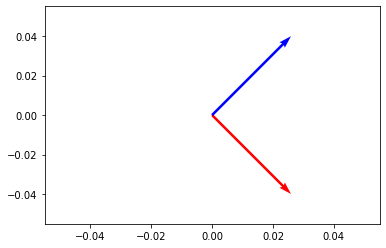

In [105]:
# use eigenvects as base and calculate it's inverse
base = eigvects.T
inv_base = np.linalg.inv(base)

# display eigenvectors
fig0, axs0 = plt.subplots()
origin = np.array([[0, 0],[0,0]])
axs0.quiver(*origin, eigvects[:,0], eigvects[:, 1], color=['r','b'], scale=3)

In [106]:
# create base line as y = 0
smps = 100
x = np.linspace(-std*4, std*4, smps)
zs = np.zeros(smps)

# rotation by 90 deg
rot_by_90 = np.array([[0, 1], [-1, 0]])
bline = np.array([zs, x*corr])
bline.shape

(2, 100)

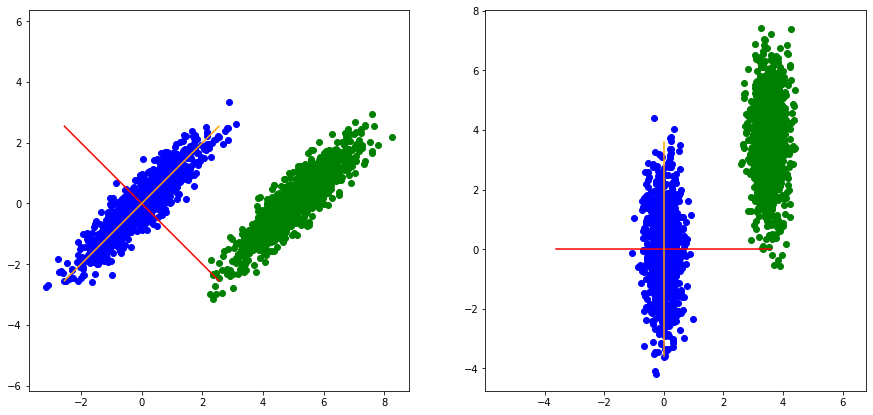

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

# y_1 = rotate baseline in the same way as points (show axis of original data)
# y_2 = is rotated by 90 deg to create ortogonal base
y_1 = bline.T @ base
y_2 = y_1 @ rot_by_90.T

# show original data + bases
axs[0].scatter(x=pts0[:,0], y=pts0[:,1], color='blue')
axs[0].scatter(x=pts1[:,0], y=pts1[:,1], color='green')
axs[0].plot(y_1[:,0], y_1[:,1], color='red')
axs[0].plot(y_2[:,0], y_2[:,1], color='orange')
axs[0].axis('equal')

# rotate points
rot_pts0 = pts0 @ base
rot_pts1 = pts1 @ base

# y_2_1 = perform same transformation on base line as on data
# y_2_2 = rotate it by 90 deg to create ortogonal base
y_2_1 = y_1 @ base
y_2_2 = y_2_1 @ rot_by_90

# show rotated data
axs[1].scatter(x=rot_pts0[:,0], y=rot_pts0[:,1], color='blue')
axs[1].scatter(x=rot_pts1[:,0], y=rot_pts1[:,1], color='green')
axs[1].plot(y_2_1[:,0], y_2_1[:,1], color='red')
axs[1].plot(y_2_2[:,0], y_2_2[:,1], color='orange')
axs[1].axis('equal')

plt.show()